# **LA_04_Linear spaces**


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy

#### **Linear (vector) space**

**Definition.** Let $\mathbb{F}$ be a field and $V$ be a set with two operations:
1. Addition: for $u,v\in V$ there sum $u+v \in V$ is defined.
2. Multiplication by a scalar: for $\lambda\in \mathbb{F}$ and $v\in V$ $\lambda v\in V$ is defined.

$V$ is called a linear (vector) space over the field $\mathbb{F}$ with elements called vectors if the following properties hold for all $u,v,w \in V$ and $\lambda, \mu\in \mathbb{F}$:

1) Addition associativity: $(u+v)+w =u+ (v+w)$.

2) Addition commutativity: $u+v=v+u$.

3) Null(zero) vector existence: $\exists \Theta: u+\Theta=\Theta+u$.

4) Negative vector existence: $\forall u\in V \exists (-v)\in V: v+(-v)=(-v)+v=\Theta$.

5) Scalar multiplication associativity: $\lambda(\mu v) = (\lambda\mu)v$.

6) Unity action: $1\cdot v = v$, where $1$ is the unity element of a field.

7) Distributivity on vectors: $\lambda(u+v)=\lambda u +\lambda v$.

8) Distributivity on scalars: $(\lambda+\mu)v = \lambda v+\mu v$.

The null vector $\Theta$ is usually denoted just as $0$ if the context is clear.

**Examples.**
1. $\mathbb{F}^n=\{(\alpha_1, \dots, \alpha_n)\mid \alpha_j\in \mathbb{F}\}$ over the field $\mathbb{F}$. The addition and scalar multiplication are componentwise.

2. $Mat(m×n, \mathbb{F})$ -- the set of $m\times n$-matrices with elements from $\mathbb{F}$ -- over the field $\mathbb{F}$. The addition and scalar multiplication are componentwise.

3. $\mathbb{F}[x]$ -- the set of polynomials on $x$ with coefficients from $\mathbb{F}$ -- over the field $\mathbb{F}$ with usual addition and scalar multiplication of polynomials.


#### **Linear independence and basis**

**Definition.** A system of vectors $v_1, v_2, \dots, v_n$ in a vector space $V$ is said to be *linearly independent* if the only scalars satisfying $\lambda_1v_1+\dots +\lambda_nv_n = \mathbb{0}$ are $\lambda_1=\dots =\lambda_n=0$. If there are scalars, not all zeros, that satisfy this equation, the system is called *linearly dependent*.

*Remark.* Strictly speaking, we should call a *set*, not a *system* of vectors linearly (in)dependent, but further it will be convenient to use  the ordered sequences of vectors, so we prefer to use the term "*system*" for a sequence of vectors, ordered or unordered dependent on a context.

*Example.* The system $v_1=(1,2), v_2=(1, -1), v_3=(2,1)$ is dependent since $v_1+v_2-v_3=0$. We can also express a vector from this equation, say $v_3=v_1+v_2$, and say that this system is linearly dependent since one of the vectors is a linear combination of others.

Note, that linearly independent system cannot contain zero vector, two similar or proportional vectors.

**Definition.** A vector space $V$ is said to be *spanned* by a system of vectors $v_1, v_2, \dots, v_n$ ($V$ is a span of $v_1, v_2, \dots, v_n$), if every vector from $V$ can be given as a linear combination of this system, i.e. for each $v\in V$ there exist scalars $\lambda_1, \dots, \lambda_n$, such as $v=\lambda_1v_1+\dots+\lambda_n v_n$.

**Definition.** A system of vectors $v_1, \dots, v_n$ is said to be a basis of a space $V$, if it is linearly independent and spans $V$.

**Equivalent definition.** A system of vectors $\Delta = v_1, \dots, v_n$ is said to be a basis if it is a maximal linear independent one, i.e. every system strictly containing $\Delta$ is linear dependent.

*Examples.*

1. $\Delta = \{e_1=(1, 0, \dots, 0, 0), e_2=(0, 1, \dots, 0, 0) , \dots, e_n=(0,0, \dots, 0, 1)\}$ is a standard basis of $\mathbb{F}^n$.

2. In a linear space $\mathbb{F}_n[x]$ of polynomials of degree $\leq n$ the standard basis is $1,x, x^2, \dots, x^n$. The other basis can be $1, (x-c), (x-c)^2, \dots , (x-c)^n$.

3. The matrix unities $E_{pq}$ with elements $e_{ij}=\begin{cases}
1, \mbox{ if } i=p, j=q;\\
0, \mbox{ otherwise}.
\end{cases}$ give the basis of $Mat(m×n, \mathbb{F})$.



---

#### **Coding sample: check linear independence.**

Generated by AI

In [27]:
# to solve a non-square system we use symbolic computations with sympy

import sympy as sp
# Define symbols
x1, x2, x3 = sp.symbols('x1 x2 x3')
x = sp.Matrix([x1, x2, x3])

# Define matrices A, B and vector z
A = sp.Matrix([[1, 2, 3],
               [2, 3, 4],
               [3, 4, 5],
               [4, 5, 6]])
B = sp.Matrix([[1, 1, 1],
               [1, 1, 0],
               [1, 1, 0],
               [0, 1, 0]])
z = sp.Matrix([0, 0, 0, 0])

# Solve the homogeneous system A * x = 0
solutionA = sp.solve_linear_system(A.row_join(z), x1, x2, x3)
solutionB = sp.solve_linear_system(B.row_join(z), x1, x2, x3)


print("General solution Ax=0:")
sp.pprint(solutionA)
print(f"The columns of \n {A}\n are linear dependent")

print('\n')

print("General solution Bx=0:")
sp.pprint(solutionB)
print(f"The columns of \n {B}\n are linear independent")

General solution Ax=0:
{x₁: x₃, x₂: -2⋅x₃}
The columns of 
 Matrix([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
 are linear dependent


General solution Bx=0:
{x₁: 0, x₂: 0, x₃: 0}
The columns of 
 Matrix([[1, 1, 1], [1, 1, 0], [1, 1, 0], [0, 1, 0]])
 are linear independent




---



#### **The properties of basis**

Let $V$ be a (non-zero) linear space over the field $\mathbb{F}$.

**Theorem [on basis decomposition]**. Let $\Delta = \{v_1, \dots , v_n\}$ be a basis of $V$. Then every $x\in V$ is a linear combination $x=x_1v_1+\dots+x_n v_n$ with uniquely (!) defined $x_1, \dots , x_n\in\mathbb{F}$.  

**Definition.** The scalars $x_1,\dots, x_n$ from the previous theorem are called the coordinates of $v$ in the basis $\Delta$.

**Theorem [correctness of dimension definition].** If $V$ has a basis then all bases have the same number of vectors.  

**Definition.** If $V$ has a (finite) basis, then the number of vectors of this (and every other) basis is called the dimension of $V$.

*Remark.* Linear algebra studies only the linear spaces with finite bases.
 There exist linear spaces with no finite basis (e.g. $\mathbb{F}[x]$ or other spaces, containing functions), they are the object for functional analysis.

In what follows we consider only linear spaces with finite basis, if the other is not specified.

**Theorem [on basis completion].** For every linear independent system $v_1, \dots, v_k$ in $n$-dimensional $V$ there exist $v_{k+1},\dots, v_n $, such as $v_1, \dots, v_k, v_{k+1}, \dots , v_n$ is a basis of $V$.


---

#### **Coding sample: check the basis**
If $\Delta = a_1, \dots, a_n\in \mathbb{F}^n$ and $A$ is a matrix with columns $a_j$, than $\Delta$ is a basis iff $\det A\ne 0$.


In [ ]:
A = np.array([[1,1,1], [0,1,1], [0,0,1]])

detA = np.linalg.det(A)

print(f"Check if columns of A= \n{A}\n is a basis: {(not np.isclose(detA, 0))}")

Check if columns of A= 
[[1 1 1]
 [0 1 1]
 [0 0 1]]
 is a basis: True



---


#### **Isomorphism theorem**

**Definition.** Linear spaces $V$ and $W$ over the field $\mathbb{F}$ are said to be isomorphic ($V≃W$) if there exist a bijection $\varphi: V \rightarrow W$ with the following two properties for every $u, v\in V$ and $\lambda\in \mathbb{F}$:

1)  $\varphi(v+u)=\varphi(v)+\varphi(u)$;

2) $\varphi(\lambda v) = \lambda\varphi(v)$.

**Theorem [Isomorphism theorem].** Linear spaces $V$ and $W$ over the field $\mathbb{F}$ are isomorphic if and only if $\dim V=\dim W$.

*Example.* $\mathbb{R}_n[x]≃\mathbb{R}^{n+1}$, since $\dim \mathbb{R}_n[x]= \dim \mathbb{R}^{n+1}=n+1$. If $\Delta = e_1, \dots, e_{n+1}$ is a standard basis for $\mathbb{R}^{n+1}$ and $1, x, x^2, \dots, x^n$ is a basis for $\mathbb{R}_n[x]$, then an isomorphism can be given as $\varphi(e_j)=x^{j-1}$ and then expand by linearirty, i.e. $\varphi(a_0, a_1, \dots, a_n)=a_0 + a_1x+\dots +a_nx^n$.



---
#### **Coding sample: use isomorphism to get a basis decomposition**

Given 4 matrices $A,B, C, D$ in $Mat(2, \mathbb{R})$ check, that they give a basis of $Mat(2, \mathbb{R})$ and find the coordinates of $X$ in this basis.

We will use the isomorphism $A=\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{pmatrix} \leftrightarrow (a_{11}, a_{12}, a_{21}, a_{22})\in\mathbb{R}^4$ to solve the problem.




In [23]:
A = np.array([[1, 1], [1, 2]])
B = np.array([[1, 2], [0, 1]])
C = np.array([[0, 1], [1, 1]])
D = np.array([[1, 0], [2, 1]])
X = np.array([[3, 4], [4, 5]])

matrices = [A, B, C, D]
flat_matrices = [M.flatten() for M in matrices]      #isomorphism of matrices with vectors in R^4
x = X.flatten()                                      # isomorphism of X matrix and a vector
H = np.vstack(flat_matrices).T                       # vectors to columns
check_basis = not(np.isclose(np.linalg.det(H), 0))   # check basis with determinant test

print(f"A, B, C, D give a basis: {check_basis}")

if check_basis:
  coords = np.linalg.solve(H, x)
  print(f"X = {coords[0]:.2f} A + {coords[1]:.2f} B + {coords[2]:.2f} C + {coords[3]:.2f} D")
else:
  print("Decomposition is impossible")

A, B, C, D give a basis: True
X = 1.00 A + 1.00B + 1.00C + 1.00D




---



#### **Change of basis**

Note that in different bases the vector will have different coordinates. We will find the relations between these coordinates.

**Definition.** Let $\Delta = e_1, \dots, e_n$ and $\Delta' = f_1, \dots , f_n$ be two bases of a linear space $V$. Decompose $\Delta'$ vectors by basis $\Delta$ and write the coordinates for every $f_j$ into the j-th column of a matrix, i.e for $f_j=\displaystyle\sum_{i=1}^n\alpha_{ji}e_i$ consider the matrix $\underset{\Delta \rightarrow \Delta '}{T}=(a_1, \dots, a_n)$, with columns $a_j = \displaystyle \begin{pmatrix}
\alpha _{j1}\\
\alpha _{j2}\\
\dotsc \\
\alpha _{jn}
\end{pmatrix}$. Then $\underset{\Delta \rightarrow \Delta '}{T}$ is called a *transition matrix* from $\Delta$ to $\Delta'$.  

This definition can be written in a matrix form $(f_1, \dots, f_n)=(e_1, \dots, e_n)\underset{\Delta \rightarrow \Delta '}{T}$.
Particularly, if $e_i, f_j\in \mathbb{F}^n$ and $E$ and $F$ are the matrices with columns $e_i$ and $f_j$ respectively, than $F=E\underset{\Delta \rightarrow \Delta '}{T}$ and $\underset{\Delta \rightarrow \Delta '}{T}=E^{-1}F$.  

It is hold for transition matrix:

1. $\underset{\Delta \rightarrow \Delta '}{T}$ is invertible.

2. $\underset{\Delta \rightarrow \Delta '}{T^{-1}}= \underset{\Delta' \rightarrow \Delta}{T}$

For vector $x=x_1 e_1+\dots+x_n e_n=x'_1f_1+ \dots +x'_nf_n$ the relations between coordinates $(x_1, \dots , x_n)$ and $(x'_1, \dots, x'_n)$ can be given as
$\begin{pmatrix}
x_1\\
x_2\\
\dotsc \\
x_n
\end{pmatrix} = \underset{\Delta \rightarrow \Delta '}{T}\begin{pmatrix}
x'_1\\
x'_2\\
\dotsc \\
x'_n
\end{pmatrix}$ or in the opposite way
$\begin{pmatrix}
x'_1\\
x'_2\\
\dotsc \\
x'_n
\end{pmatrix} = \underset{\Delta \rightarrow \Delta '}{T^{-1}}\begin{pmatrix}
x_1\\
x_2\\
\dotsc \\
x_n
\end{pmatrix}$.



---
#### **Coding sample: transition matrix from a basis to another basis**


In [ ]:
A = np.array([[1,1,1], [0,1,1], [0,0,1]])
B = np.array([[2,3,4], [1,2,3], [0,1,1]])

T = (np.linalg.inv(A)) @ B

print(f"A= {A}")
print(f"B= {B}")
print(f"T = {T}")
print(f"is a transition matrix from basis formed by columns of A to basis formed by columns of B")

print(f"Check if b1=t_11*a_1+t_21*a_2+t_31*a_3:", np.allclose(A @ T.T[0], B.T[0]))


A= [[1 1 1]
 [0 1 1]
 [0 0 1]]
B= [[2 3 4]
 [1 2 3]
 [0 1 1]]
T = [[1. 1. 1.]
 [1. 1. 2.]
 [0. 1. 1.]]
is a transition matrix from basis formed by columns of A to basis formed by columns of B
Check if b1=t_11*a_1+t_21*a_2+t_31*a_3: True




---



#### **Matrix rank**

**Definition.** The maximal number of linear independent vectors in a system $v_1, \dots, v_k$ is said to be a rank of  this system.

**Definition.** For matrix $A_{m\times n}=( a_{1} ,\ \dotsc ,\ a_{n}) = \left(\begin{array}{ c }
r_{1}^{t}\\
\vdots \\
r_{m}^{t}
\end{array}\right)$ with column-vectors $a_1, \dots , a_n$ and row-vectors $r_1, \dots, r_m$ the *column rank* of $A$ is $rank(a_1, \dots, a_n)$ and the *row rank* of $A$ is $rank(r_1, \dots , r_m)$.

Note that for the matrix $A_{m\times n}$ with elements from the field $\mathbb{F}$ its columns are the vectors from $\mathbb{F}^m$ and the rows are the vectors from $\mathbb{F}^n$.

**Theorem [Matrix rank theorem].** The column rank of a matrix equals its row rank and equals the order of the maximal nonzero minor (i.e subdeterminant) of this matrix.
*Remark.* The number from the theorem is called the *rank of the matrix* and the maximal non zero minor is called the *basis minor*.

The following theorem gives the way to calculate the matrix rank.

**Theorem [on linear independent columns of a matrix and its REF].**
A system of some columns of a matrix $A$ is linear independent if and only if the columns with the same numbers of $REF(A)$ are linear independent.

*Example.* Find $rank A$ for $A=\begin{pmatrix}
1 & 1 & 2 & 3\\
2 & 2 & 4 & 6\\
1 & 2 & 1 & 3
\end{pmatrix}$.

Construct the $REF(A)$:

$A=\begin{pmatrix}
1 & 1 & 2 & 3\\
2 & 2 & 4 & 6\\
1 & 2 & 1 & 3
\end{pmatrix} \sim \begin{array}{ c }
 \\
II-2I\\
III-I
\end{array}\begin{pmatrix}
1 & 1 & 2 & 3\\
0 & 0 & 0 & 0\\
0 & 1 & -1 & 0
\end{pmatrix} \sim \begin{pmatrix}
\color{red}{1} & \color{red}{1} & 2 & 3\\
\color{red}{0} & \color{red}{1} & -1 & 0\\
0 & 0 & 0 & 0
\end{pmatrix} = REF(A).$

There are no non-zero minors of order 3 in the $REF(A)$ since each minor of order 3 contains the zero row. Hence, the basis minor of $REF(A)$ can be taken in the first two columns (marked red). That is why the first two columns are linearly independent in $REF(A)$ and, hence, in $A$. And $rank(A)=2$.



---
#### **Coding sample: rank of a matrix**

In [28]:
#sample matrices
A = np.array([[1,1,1], [0,1,1], [0,0,1]])
B = np.array([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])

#rank calculation
rankA = np.linalg.matrix_rank(A)
rankB = np.linalg.matrix_rank(B)

print(f"A=\n {A} \n rank(A) = {rankA}")
print(f"B=\n {B} \n rank(B) = {rankB}")

A=
 [[1 1 1]
 [0 1 1]
 [0 0 1]] 
 rank(A) = 3
B=
 [[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]] 
 rank(B) = 1




---



#### **Linear subspaces**

Linear subspaces are generalization of usual lines and planes in a space. And as lines and planes they can be given by linear equations. We will discuss it in what follows.

Let $V$ be a linear space over the field $\mathbb{F}$.

**Definition.** A subset $W\subset V$  is a linear subspace (denote by $W < V$), if it is closed under addition and scalar multiplication, i.e.
1.  $x+y\in W$ for every $x, y\in W$.
2.  $\lambda x\in W$ for every $x\in W$ and scalar $\lambda$.

The definition directly implies that

1. The subspace is closed under linear combinations, i.e., $\lambda x+\mu y \in W$ for every $x, y\in w$ and scalars $\lambda, \mu$.

2. Null vector is contained in every subspace.

3. A subspace is a linear space itself, but it is contained in a bigger one.

*Examples.*

1. Every line or plane in $\mathbb{R}^3$ containing null is a subspace.

2. Diagonal (upper triangular, scalar, symmetrical) matrices form a subspace in $Mat(n, \mathbb{F})$.  

#### **Span**

Spans give the general construction for subspaces, which should contain certain vectors.

**Definition.** For $a_1, \dots, a_k\in V$ the span $Lin(a_1, \dots, a_k)$ (or $⟨a_1, \dots , a_k⟩$) is a set of all the linear combinations $\{\alpha_1a_1+\dots+\alpha_ka_k \mid \alpha_1, \dots, \alpha_k\in \mathbb{F}\}$.

**Theorem [on a span dimension].** $\dim Lin(a_1, \dots, a_k) = rank(a_1, \dots, a_k)$.

*Example.* Find the basis and dimension of $W=Lin(a_1, a_2, a_3)$, where $a_1=(1,1,2), a_2=(1, 0, 1), a_3 = (2, 1, 3)$.

Consider the matrix $A$ with columns $a_1, a_2, a_3$ and reduce it to REF $U$:

$A=\begin{pmatrix}
1 & 1 & 2\\
1 & 0 & 1\\
2 & 1 & 3
\end{pmatrix} \sim \begin{array}{ c }
 \\
II-I\\
III-2I
\end{array}\begin{pmatrix}
1 & 1 & 2\\
0 & -1 & -1\\
0 & -1 & -1
\end{pmatrix} \sim \begin{array}{ c }
 \\
 \\
III-II
\end{array}\begin{pmatrix}
1 & 1 & 2\\
0 & -1 & -1\\
0 & 0 & 0
\end{pmatrix} =U$

$rank U = 2$, and the basis minor is contained in the first 2 columns of $U$. Due to the theorem on linear independent columns of a matrix and its REF $a_1, a_2$ are the basis of $W$ and $\dim W=2$.

#### **Coging sample: span of two noncomplanar vectors in $\mathbb{R}^3$ is a plane**

generated by AI


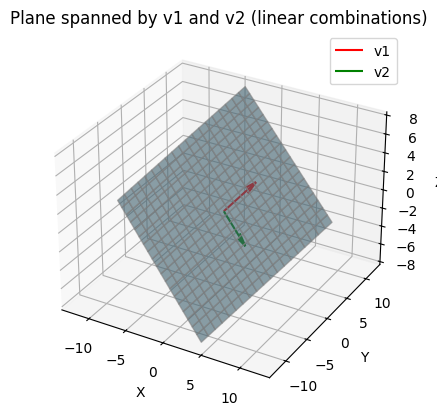

In [36]:
# Define the two 3D vectors
v1 = np.array([2, 4, 2])
v2 = np.array([4, -2, -2])

# Create a grid of coefficients (s, t) for the linear combinations
s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)

# Compute the linear combinations: s*v1 + t*v2
X = S * v1[0] + T * v2[0]
Y = S * v1[1] + T * v2[1]
Z = S * v1[2] + T * v2[2]

# Plotting the plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, alpha=0.6, color='skyblue', edgecolor='gray')

# Plot the original vectors
origin = np.array([0, 0, 0])
ax.quiver(*origin, *v1, color='red', label='v1')
ax.quiver(*origin, *v2, color='green', label='v2')

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.title("Plane spanned by v1 and v2 (linear combinations)")
plt.show()

#### **Fundamental subspaces of a matrix**

Every matrix gives rise to 4 fundamental subspaces, characterizing the space and the matrix as well.

Let $A_{m\times n}=(a_{ij}) = \left(\begin{array}{ c c c }
| &  & |\\
c_{1} & \dotsc  & c_{n}\\
| &  & |
\end{array}\right) = \left(\begin{array}{ c c c }
- & r_{1,}^{t} & -\\
 & \vdots  & \\
- & r_{m,}^{t} & -
\end{array}\right) $ be a matrix with elements from the field $\mathbb{F}$.

**Definition.**

*Row space* of $A$ is $R(A) = Lin(r_1, \dots, r_n)$.

*Column space* of $A$ is $C(A) = Lin(a_1, \dots, a_n)=R(A^t)$.

*Null space* of $A$ is $N(A) = \{x\in \mathbb{F}^n: Ax=0\}$.

*Left null space* of $A$ is $N(A^t)$.

$R(A)$, $N(A)$ are the subspaces in $\mathbb{F}^n$, while the
$C(A)$, $N(A^t)$ are the subspaces in $\mathbb{F}^m$.

We can characterize the dimensions of four fundamental subspaces in terms of $r = rank A$.


Elementary row operations leave the rows of the transformed matrix in the row space of the initial matrix. It implies

**Theorem [on row space].**

1. $R(A)=R(REF(A))=R(RREF(A))$.
2. The non zero rows of $(R)REF(A)$ are the basis of $R(A)$.
3. $\dim(R(A)) = r.$

Null space $N(A)$ is a set of solutions of homogenous linear system $Ax=0$. Elementary row operations of $A$ transform this system into equivalent.
Recall that we can get a solution for system $Ax=0 $in a vector form.

For $ RREF(A)=\left( \begin{array}{c c c c c c c c }
l_{1,i_{1}} & 0 &  &  & 0 & \dotsc  &  & * \\
 & l_{2,i_{2}} &  &  & 0 & \dotsc  &  & * \\
 &  & &  &  & \dotsc  &  &   \\
 &  &  &  & l_{r,\ i_{r}} & \dotsc  &  & * \\
0 &  &  &  &  &  &  & 0 \\
 &  &  &  &  &  &  & \dotsc   \\
0 &  &  &  &  &  &  & 0
\end{array}\right)$ we take $x_{i_1},\dots,  x_{i_r}$ corresponding to pivot columns as the main $r$ unknowns of the system and the other $n-r$ uknowns, that we denote as $y_1, \dots, y_{n-r}$, as free ones. Every solution of a system can be expressed through $y_j$ and the coefficients taken from $RREF(A)$ as
$\begin{pmatrix}
x_{1}\\
\dotsc \\
x_{n}
\end{pmatrix} =y_{1}\begin{pmatrix}
\beta _{11}\\
\dotsc \\
\beta _{1n}
\end{pmatrix} +\dotsc +y_{n-r}\begin{pmatrix}
\beta _{n-r,\ 1}\\
\dotsc \\
\beta _{n-r,\ n}
\end{pmatrix}$.

Here, the matrix $B=(\beta_{ij})$ is of rank $n-r$ since it contains $n-r$ rows corresponding to $n-r$ free unknowns, which form the identity matrix ($y_j=y_j$). Hence the columns $b_j=\begin{pmatrix}
\beta _{j1}\\
\dotsc \\
\beta _{jn}
\end{pmatrix}$ are linearly independent. They are called the *fundamental system of solutions* of $Ax=0$.

This can be summarized in

**Theorem [on null space].**

1. $N(A) = N(REF(A))= N(RREF(A))$.
2. The fundamental system of solutions of $Ax=0$ is a basis of $N(A)$.
3. $\dim(N(A)) = n-r$.

Note that $\dim(R(A))+\dim (N(A)) = n=\dim (\mathbb{F^n})$.

The theorem on linear indepenent columns of $A$ and $(R)REF(A)$ gives the characterization of $C(A)$

**Theorem [on column space]**

1. The columns of $A$ corresponding to pivot columns in $(R)REF(A)$ are the basis of $C(A)$.
2. $\dim(C(A)) = r$.

Similarly to the $N(A)$ the left null space $N(A^t)$ is of dimension $m-r$ and $\dim(C(A))+\dim(N(A^t))=m=\dim(\mathbb{F}^m)$.

The geometrical picture of fundamental spaces in $\mathbb{R}^n$ and $\mathbb{R}^m$ can be given as

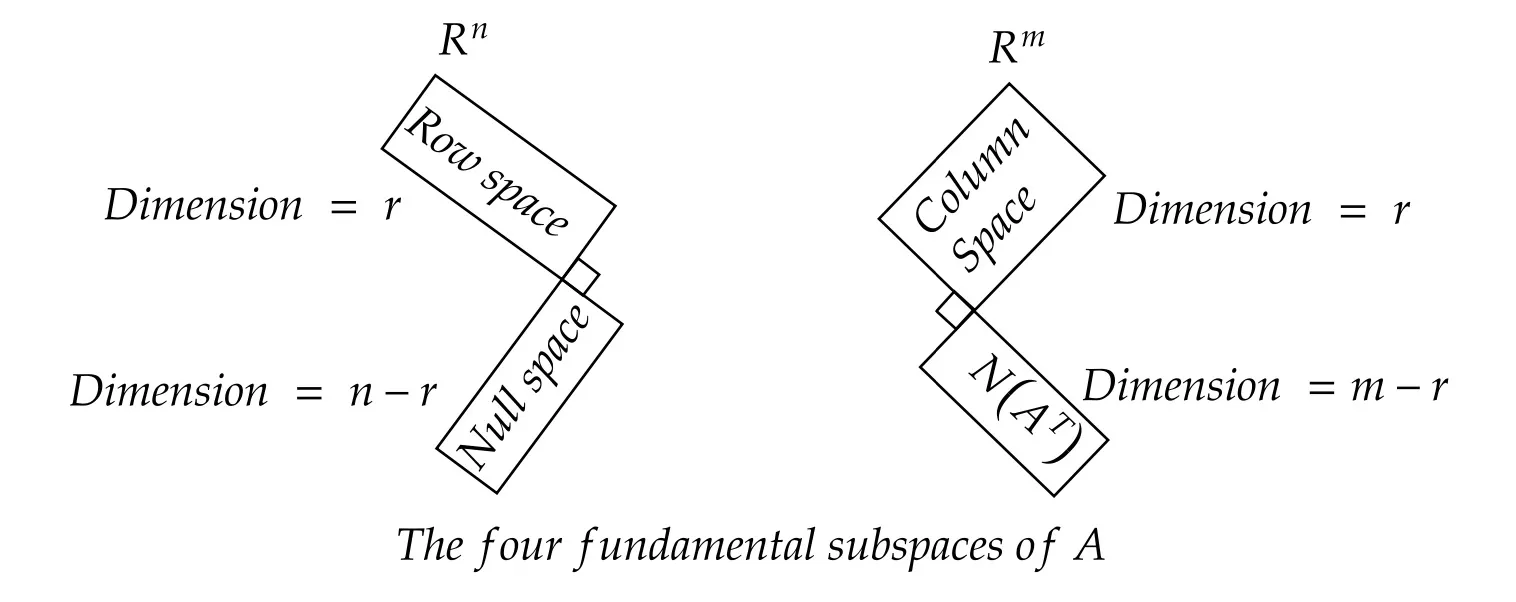

Keep a note for the future that in $\mathbb{R}^n$  as it shown in the picture $R(A)$ and $N(A)$ have the only common vector (zero) and are orthogonal, as well as $C(A)$ and $N(A^t)$ in $\mathbb{R}^m$. We will discuss orthogonality in the next topic. The same holds for complex matrices (i.e., for subspaces in $\mathbb{C}^n$ and $\mathbb{C}^m$).

But although the theorems on raw space, column space, and null space hold over the arbitrary field, the geometric picture can change, particularly $R(A)$ and $N(A)$ can have not only zero common vector.



---
#### **Coding sample: null space and column space**


In [42]:
from sympy import Matrix

A = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])

ns = A.nullspace()
cs = A.columnspace()

print(f"A \n {A}\n")
print(f'The basis of N(A) is\n {ns}.\n The basis of C(A) is \n {cs}.')

A 
 Matrix([[1, 1, 2], [2, 1, 3], [3, 1, 4]])

The basis of N(A) is
 [Matrix([
[-1],
[-1],
[ 1]])].
 The basis of C(A) is 
 [Matrix([
[1],
[2],
[3]]), Matrix([
[1],
[1],
[1]])].




---



#### **The general theory of linear equations**

The consideration of matrix fundamental subspaces gives us the important applications, namely we can describe the linear systems and their solution sets in a general way.

The following theorem gives the generalization of the fact that planes and lines are given by linear equations.

**Theorem [on subspaces and homogenous linear systems duality].**

1. For each homogenous linear system $Ax=0$  its solution set is a linear subspace $N(A)$ of dimension $n-r$, where $n$ is a number of columns of A and $r=rank A$.

2. If $W<\mathbb{F}^n$ is a linear subspace of dimension $k$ than there exists $A_{r\times n}$ of rank $r$, such as $W=N(A)$ and $k=n-r$.

Now, for the nonhomogeneous system $Ax=b$, the left side seen as a linear combination of columns of $A$ gives

**Theorem [on consistency of a nonhomogeneous linear system].**
$Ax=b$ is consistent if and only if

1. $b\in C(A)$.

2. [*Kronecker–Capelli*] $rank A = rank (A\mid b)$.

The solution set of a nonhomogeneous linear system is not a subspace (since it does not contain $0$), but it can be seen as a subspace shifted from the origin by some vector.

**Theorem [on solution set of nonhomogeneous system].**

Let $P$ be a solution set of the system $Ax=b$.
Then $P=x_p + N(A) =\{x_p+x_n \mid x_n\in N(A)\}$, where $x_p$ is a partial solution, i.e. $Ax_p=b$.

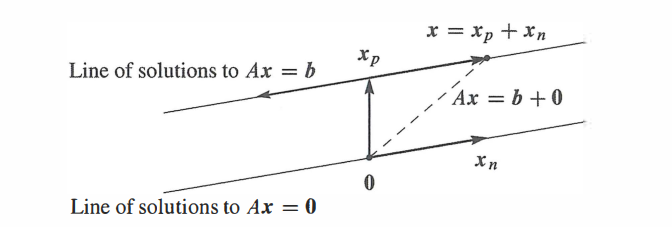

#### **The intersections and the sums of subspaces**

Let $U, V < W$ be subspaces.

**Defifnition** An *intersection* $U\cap V = \{x\in W \mid x\in U\ and\ x\in V\}$.

**Definition** A *sum* $U+V=\{u+v \mid u\in U, v\in V\}$.

$U\cap V$ and $U+V$ are subspaces of $W$. Note that the union $U\cup V$ is not necessary the subspace of $W$. The smallest subspace containing $U$ and $V$ is at once $U+V$.

**Definition** A sum of subspaces $U$ and $V$ is said to be *direct* (denote $U⊕V$), if $U\cap V=\{0\}$.


The most important property of the direct sum is that it allows us to find the unique projections of a vector onto its summands $U$ and $V$ .

**Theorem [on direct sum summands projections].**
For each $x\in U⊕V$, there exist the unique $u\in U, v\in V$ such as $x=u+v$ (they are called the projections onto $U$ and $V$ respectively).

The dimensions of sum and intersection are related by the following theorem:

**Theorem [Grassman].**

For subspaces $U, V$ $$\dim (U\cap V) + \dim (U + V) = \dim U + \dim V.$$

Going back to matrix fundamental subspaces, we can state that in $\mathbb{R}^n$ and $\mathbb{R}^m$:

1. $R(A)\cap N(A) = \{0\}$ and $R(A)\oplus N(A) = \mathbb{R}^n$.

2. $C(A)\cap N(A^t) = \{0\}$ and $C(A)\oplus N(A^t) = \mathbb{R}^m$.

We will explain it in the next topic with the help of orthogonality.